# Extra Activity - Least squares method

**Ojeda Contreras Braulio Melquisedec**

**November 11th, 2022**

*Requirements:*

Using the peleteria.csv dataset do the following:
1. Load the dataset into a pandas dataframe
2. Divide the dataset in training set (90%) and test set (10%) ensuring to shuffle them and fixing the random state seed as 0
3. Using the training set calculate the corresponding sumatories from the least squares method
4. Build the model (linear regression) and plot the line accompanied with the training set scatter plot
5. Predict the values for the test set and compare it with the real values
6. Plot the model again but now with the test set scatter plot

In [1]:
# Importing needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plot
plot.style.use('seaborn')
%matplotlib inline

In [2]:
# Setting configuration for pandas dataframes visualizations
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

In [3]:
# Create a data.frame with the file given
df = pd.read_csv('./peleteria.csv', sep=',', engine='python')

In [4]:
df.head(10)

,x,y
0,3,5
1,7,11
2,11,21
3,15,16
4,18,16
5,27,28
6,29,27
7,30,25
8,30,35
9,31,30


In [5]:
# Indicating tag column name
tag_name = 'y'

In [6]:
# Corpus without tags
X = df.drop(tag_name, axis=1).values
X

array([[ 3],
       [ 7],
       [11],
       [15],
       [18],
       [27],
       [29],
       [30],
       [30],
       [31],
       [31],
       [32],
       [33],
       [33],
       [34],
       [36],
       [36],
       [36],
       [37],
       [38],
       [39],
       [39],
       [39],
       [40],
       [41],
       [42],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [50]])

In [7]:
# Tags
y = df[tag_name].values
y

array([ 5, 11, 21, 16, 16, 28, 27, 25, 35, 30, 40, 32, 34, 32, 34, 37, 38,
       34, 36, 38, 37, 36, 45, 39, 41, 40, 44, 37, 44, 46, 46, 49, 51])

In [8]:
# Getting training and test data
X_e, X_p, y_e, y_p = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = 0)

In [9]:
# Calculating sumatories from the least squares method
def linear_regression_least_squares(X, y):
    sum_X = np.sum(X)
    print("Sum X =", sum_X)
    sum_y = np.sum(y)
    print("Sum y =", sum_y)
    sum_X_y = np.sum(np.multiply(np.ravel(X), y))
    print("Sum X*y =", sum_X_y)
    sum_X_pow_2 = np.sum(np.multiply(np.ravel(X), np.ravel(X)))
    print("Sum X^2 =", sum_X_pow_2)
    n = len(X)
    print("n =", n)

    b_1 = ((n * sum_X_y) - (sum_X * sum_y)) / ((n * sum_X_pow_2) - (sum_X)**2)
    b_0 = (sum_y - b_1 * sum_X) / n
    
    return b_0, b_1

In [10]:
# Building the distinct elements of the plot
def plot_linear_regression(x, fx, b_0, b_1, X, y):
    fig, ax = plot.subplots()
    ax.plot(x, eval(fx), color = "green")
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.grid(True, linestyle = "-")
    ax.scatter(X, y)
    ax.annotate("", xy = (xmax, 0), xytext=(xmin, 0),
                arrowprops = dict(color = 'gray', width = 1.5, headwidth = 8, headlength = 10))
    ax.annotate("", xy = (0, ymax), xytext=(0, ymin),
                arrowprops = dict(color = 'gray', width = 1.5, headwidth = 8, headlength = 10))
    title = "y = " + str(round(b_0, 4)) + " + " + str(round(b_1, 4)) + "x"
    plot.title(title)
    plot.show()

In [11]:
def predict(x, fx, b_0, b_1):
    y = eval(fx)
    return y

In [12]:
# Linear regression from training data
b_0, b_1 = linear_regression_least_squares(X_e, y_e)
print("b_0 =", b_0)
print("b_1 =", b_1)

Sum X = 956
Sum y = 980
Sum X*y = 35983
Sum X^2 = 35564
n = 29
b_0 = 3.8577073752342015
b_1 = 0.9080820984500085


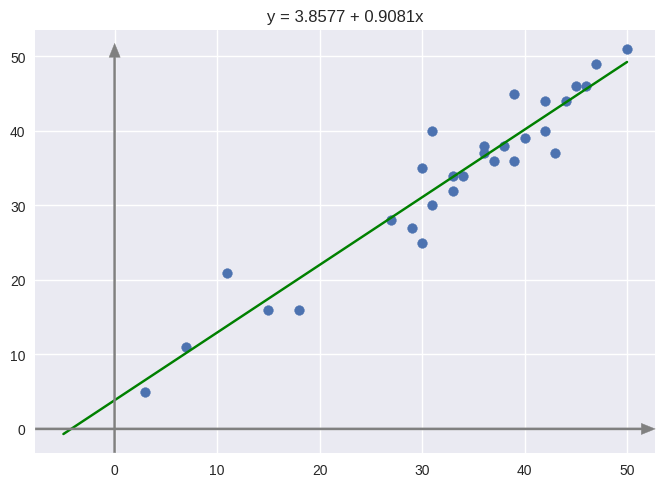

In [13]:
training_fx = "b_0 + b_1 * x"
plot_linear_regression(np.linspace(-5, 50, 1000), training_fx, b_0, b_1, X_e, y_e)

In [14]:
comparison = pd.DataFrame(
    np.array([[x[0], pred[0], y, abs(pred[0] - y)] for x, pred, y in zip(X_p, predict(X_p, training_fx, b_0, b_1), y_p)]),
    columns = ['X', 'predicted_value', 'real_value', 'absolute_error'])
comparison

,X,predicted_value,real_value,absolute_error
0,32.0,32.916,32.0,0.916
1,39.0,39.273,37.0,2.273
2,41.0,41.089,41.0,0.089
3,36.0,36.549,34.0,2.549


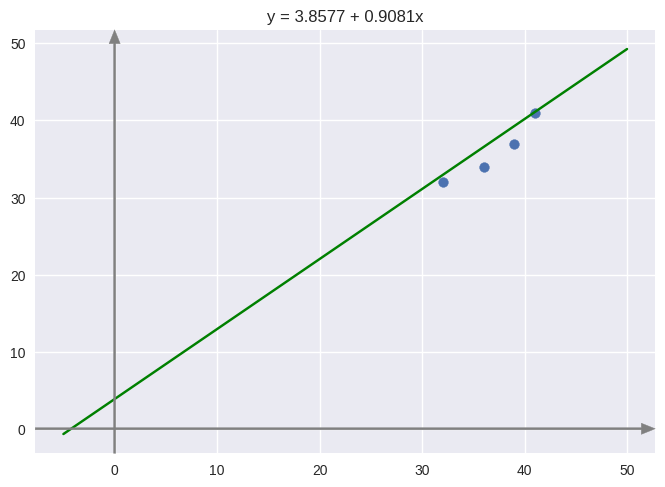

In [15]:
training_fx = "b_0 + b_1 * x"
plot_linear_regression(np.linspace(-5, 50, 1000), training_fx, b_0, b_1, X_p, y_p)